# Week 5: Root Finding
## Rahman notes:

In the theory lectures we looked at three different root finding techniques, and applied them to a function that looked something like $f(x) = x^3$.  Here let's look at a concrete, but nontrivial function.  Consider the functions $f(x) = x\cos(x)$ on the interval $[2,5]$.  Suppose we are looking for the local extrema of this function; i.e., we look for the roots of $f'(x) = \cos(x) - x\sin(x)$.

Lets first plot the two functions to give us a graphical idea of what is happening.

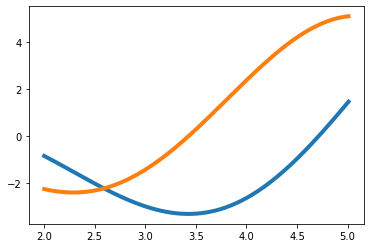

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(2, 5.01, 0.001)
f = x*np.cos(x)
df = np.cos(x) - x*np.sin(x)

plt.plot(x, f, x, df, linewidth=4)

## Section Search: Iterate and Pray
Notice that we have a discretization of x already in the plot above.  And from that we have a discretization of $f'(x)$.  Now all we have to do is find the entry of x that corresponds to $f'(x)$ that is closest to zero.  In order to do that all we have to do is find the entry that gives us the minimum of the absolute value of $f'(x)$.

In [ ]:
x = np.arange(2, 5.01, 0.001)
df = np.cos(x) - x*np.sin(x)
root_entry = np.argmin(np.abs(df));
root = x[root_entry];
print('root = ', root, '\n derivative = ', df[root_entry])

root =  3.425999999999843 
 derivative =  0.0014686190416193234


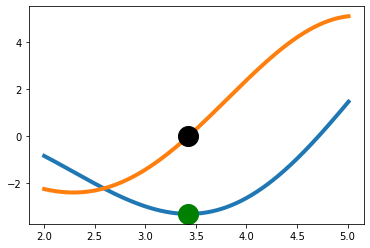

In [ ]:
plt.plot(x, f, x, df, linewidth=4)
plt.plot(root, 0, 'k.', root, f[root_entry], 'g.', markersize = 40)

Remeber, these are just approximations.  That is not far off!  But that is because we use a quite fine discretization.  Let's try it with a much coarser discretization.  This time it's quite far off the root, and since it's quite far of the root, can we even trust the local minima?

In [ ]:
x = np.arange(2, 5.01, 0.5)
f = x*np.cos(x)
df = np.cos(x) - x*np.sin(x)
root_entry = np.argmin(np.abs(df));
root = x[root_entry];
print('root = ', root, '\n derivative = ', df[root_entry])

root =  3.5 
 derivative =  0.29128460962287306


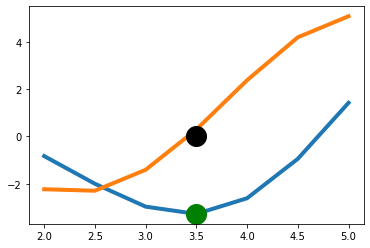

In [ ]:
plt.plot(x, f, x, df, linewidth=4)
plt.plot(root, 0, 'k.', root, f[root_entry], 'g.', markersize = 40)

Now what if we weren't restriced to a domain where the function $f'(x)$ only has one root?  Say $[-20, 5]$.

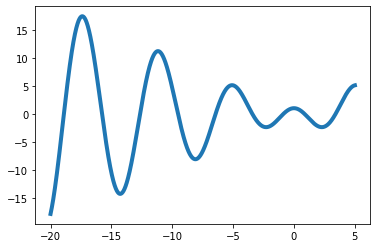

In [ ]:
x = np.arange(-20, 5.01, 0.001)
df = np.cos(x) - x*np.sin(x)
plt.plot(x, df, linewidth = 4)

Notice that this has quite a few roots.  How do we find them all?  This requires us to be a bit clever.  Let's do a for loop that goes through the entirety of x, and pick out the points when $|f'(x)|$ is decreasing and then suddenly changes direction to increasing.  Right after it changes direction we will pick the entry before it.  This is like going over the edge, and then figure out the edge was just one step behind you.

In [ ]:
x = np.arange(-20, 5.01, 0.001)
df = np.cos(x) - x*np.sin(x)
for i in range(x.shape[0]-2):
  if abs(df[i+2]) > abs(df[i+1]) and abs(df[i]) > abs(df[i+1]):
    print('\n root = ', x[i], '\n derivative = ', df[i])


 root =  -18.90299999999866 
 derivative =  -0.011200352664294422

 root =  -15.771999999994833 
 derivative =  0.011346853948969393

 root =  -12.645999999991012 
 derivative =  -0.009098095685842633

 root =  -9.529999999987204 
 derivative =  0.006447407190020793

 root =  -6.437999999983425 
 derivative =  -0.0046802352296260175

 root =  -3.4269999999797456 
 derivative =  0.005319125748225573

 root =  -0.8609999999766096 
 derivative =  -0.0013845694107378348

 root =  0.8590000000254925 
 derivative =  0.0027689919870804713

 root =  3.4250000000286285 
 derivative =  -0.002379969444347596


## Bisection Method

With bisection we must know that there is a root between two points a and b.  If there are multiple roots, it will only find one.
For the interval [-2, 5], we know for sure that there is a root between 2 and 5.  So we will bisect our interval each time until we hone in on a root.

In [ ]:
a = 2;
b = 5;
df_a = np.cos(a) - a*np.sin(a);
df_b = np.cos(b) - b*np.sin(b);
xmid = (a+b)/2;
df_mid = np.cos(xmid) - xmid*np.sin(xmid);
for i in range(10):
  if df_mid == 0:
    break
  elif np.sign(df_mid) == np.sign(df_a):
    a = xmid;
  else:
    b = xmid;

  xmid = (a+b)/2;
  df_mid = np.cos(xmid) - xmid*np.sin(xmid);
  df_a = np.cos(a) - a*np.sin(a);
  df_b = np.cos(b) - b*np.sin(b);

print('\n root = ', xmid, '\n derivative = ', np.cos(xmid) - xmid*np.sin(xmid))


 root =  3.42529296875 
 derivative =  -0.0012526522887436053


In [ ]:
a = 2;
b = 5;
df_a = np.cos(a) - a*np.sin(a);
df_b = np.cos(b) - b*np.sin(b);
xmid = (a+b)/2;
df_mid = np.cos(xmid) - xmid*np.sin(xmid);
for i in range(100):
  if df_mid == 0:
    break
  elif np.sign(df_mid) == np.sign(df_a):
    a = xmid;
  else:
    b = xmid;

  xmid = (a+b)/2;
  df_mid = np.cos(xmid) - xmid*np.sin(xmid);
  df_a = np.cos(a) - a*np.sin(a);
  df_b = np.cos(b) - b*np.sin(b);

print('\n root = ', xmid, '\n derivative = ', np.cos(xmid) - xmid*np.sin(xmid))


 root =  3.4256184594817283 
 derivative =  4.440892098500626e-16


## Newton's Method

With Newton's method we only need a nearby point to the root, however, we better be sure it's close to that root and not some other root.  And even then it may not converge.

In [ ]:
x = 5
for i in range(10):
  x = x - (np.cos(x) - x*np.sin(x))/(-2*np.sin(x) - x*np.cos(x)); #We do have to calculate the derivative here

print('\n root = ', x, '\n derivative = ', np.cos(x) - x*np.sin(x))


 root =  -15.771284874815882 
 derivative =  -7.105427357601002e-15


In [ ]:
x = 4
for i in range(10):
  x = x - (np.cos(x) - x*np.sin(x))/(-2*np.sin(x) - x*np.cos(x)); #We do have to calculate the derivative here

print('\n root = ', x, '\n derivative = ', np.cos(x) - x*np.sin(x))


 root =  3.4256184594817283 
 derivative =  4.440892098500626e-16


## Brief word on built in functions

Built in functions are useful, and it also allows you to not have to think too much about the problem at hand, but we should make sure not to be lulled into a sense of comfort.  After all, these are just computer programs, not magic.  I personally, for my work, only use built in functions if I know for sure it is optimized (e.g. on MATLAB most Linear Algebra functions are more optimized than something I could write, especially since I am not an expert in Linear Algebra).  I am an expert in Differential Equations, and in my work I rarely ever use a built in differential equation solver because I often need it to do something specialized that I know for sure the creators of the solver did not optimize.  Further, as we have seen with the backslash operator, we need to know how it works.  If we don't we can very easily make irrepreparable damage to our codes (or worse, someone else's code that we are contributing to).
You will probably not have a need to use the following function, but it is there if on the off chance you need it.  The following function looks for the local minima of our original $f(x)$ between two points, similar to bisection.  Here we use 2 and 5.  It takes in an anonymous function and the two bounds 2 and 5.

In [ ]:
import scipy.optimize

f = lambda x: x * np.cos(x)
xmin = scipy.optimize.minimize_scalar(f, bounds=(2, 5), method='Bounded')

print(xmin.x)

3.4256177072339398
